In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mplt
#不显示warn信息
import warnings
# import missingno as msno
from sklearn import preprocessing
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
newline = '\n'

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train=train.drop(train[train['SalePrice']>700000].index.values)

In [5]:
def build_normal_graph(df,pridict_val,y_lable,title):
    sns.distplot(df[pridict_val] , fit=norm)
    #
    print('------------偏斜值/峰度------------')
    print(newline)
    print("Skewness: %f" % df[pridict_val].skew())
    print("Kurtosis: %f" % df[pridict_val].kurt())
    print(newline)
    (mu, sigma) = norm.fit(df[pridict_val])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel(y_lable)
    plt.title(title)
    print('Q-Q图'+newline)
    fig = plt.figure()
    res = stats.probplot(df[pridict_val], plot=plt)
    plt.show()

------------偏斜值/峰度------------


Skewness: 0.065169
Kurtosis: 0.671029



 mu = 12.02 and sigma = 0.40

Q-Q图



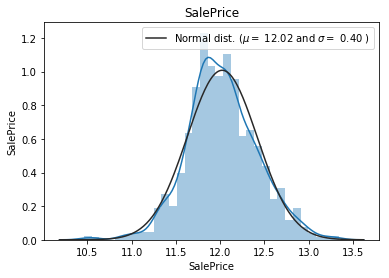

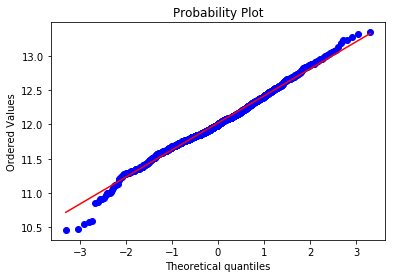

In [6]:
train['SalePrice'] = np.log1p(train['SalePrice'])
build_normal_graph(train,'SalePrice','SalePrice','SalePrice')

In [7]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice
all_data = pd.concat((train, test))
all_data.drop(['SalePrice'], axis=1, inplace=True)#测试数据不包含'SalePrice',所以需要删除

In [8]:
all_data.drop(['Utilities'], axis=1, inplace=True)

In [9]:
# 显示每列缺失值的具体比例情况：
def missing_data_percent(train):
    total = train.isnull().sum().sort_values(ascending=False)
    percent = (train.isnull().sum()/train.shape[0]).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    drop_cols = missing_data[missing_data.Percent>=0.15].index.values
    print('------------缺失值详情-----------')
    print(missing_data[missing_data['Total']>=1])
    print('------------缺失值列-----------')
    print(missing_data[missing_data['Total']>=1].index)
#     print('------------删除前的列数-------------')
#     print(len(train.columns))
#     print('---------------删除的列--------')
#     print(drop_cols)
#     print('------------删除后的列数-------------')
#     print(len(train.columns))
    return drop_cols

In [10]:
drop_clos = missing_data_percent(all_data)

------------缺失值详情-----------
              Total   Percent
PoolQC         2908  0.996915
MiscFeature    2812  0.964004
Alley          2719  0.932122
Fence          2347  0.804594
FireplaceQu    1420  0.486802
LotFrontage     486  0.166610
GarageQual      159  0.054508
GarageFinish    159  0.054508
GarageCond      159  0.054508
GarageYrBlt     159  0.054508
GarageType      157  0.053822
BsmtCond         82  0.028111
BsmtExposure     82  0.028111
BsmtQual         81  0.027768
BsmtFinType2     80  0.027425
BsmtFinType1     79  0.027083
MasVnrType       24  0.008228
MasVnrArea       23  0.007885
MSZoning          4  0.001371
BsmtHalfBath      2  0.000686
Functional        2  0.000686
BsmtFullBath      2  0.000686
Exterior2nd       1  0.000343
KitchenQual       1  0.000343
Electrical        1  0.000343
Exterior1st       1  0.000343
GarageCars        1  0.000343
TotalBsmtSF       1  0.000343
GarageArea        1  0.000343
BsmtUnfSF         1  0.000343
BsmtFinSF2        1  0.000343
BsmtFinSF1 

In [11]:
null_clos = ['GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageCond', 'GarageType',\
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',\
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',\
        'Functional', 'Electrical', 'Exterior2nd', 'KitchenQual',\
       'Exterior1st', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'BsmtUnfSF',\
       'BsmtFinSF2', 'BsmtFinSF1', 'SaleType']
null_data = all_data[null_clos]

  variableType  count
0       object     17
1      float64     10


[Text(0,0.5,'Count'),
 Text(0.5,0,'variableTypeariable Type'),
 Text(0.5,1,'Variables DataType Count')]

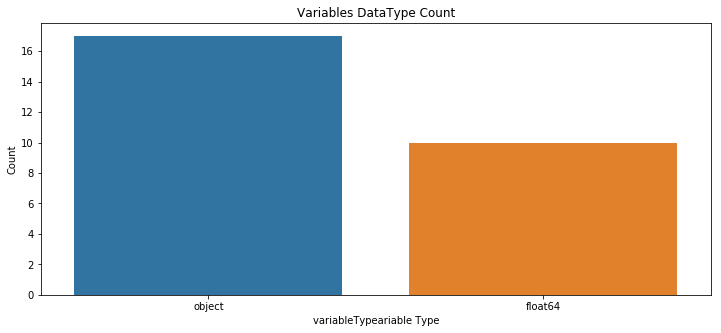

In [12]:
dataTypeDf = pd.DataFrame(null_data.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
print(dataTypeDf)
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")

In [13]:
object_col = []
int_64_col = []
float_64_col = []
for col in null_clos:
    if str(all_data[col].dtype)=='object':
        object_col.append(col)
    if str(all_data[col].dtype)=='int64':
        int_64_col.append(col)
    if str(all_data[col].dtype)=='float64':
        float_64_col.append(col)
dtype_dic = dict(object_cols=object_col,int_64_cols=int_64_col,float_64_cols=float_64_col)
dtype_dic

{'float_64_cols': ['GarageYrBlt',
  'MasVnrArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'GarageCars',
  'TotalBsmtSF',
  'GarageArea',
  'BsmtUnfSF',
  'BsmtFinSF2',
  'BsmtFinSF1'],
 'int_64_cols': [],
 'object_cols': ['GarageQual',
  'GarageFinish',
  'GarageCond',
  'GarageType',
  'BsmtCond',
  'BsmtExposure',
  'BsmtQual',
  'BsmtFinType2',
  'BsmtFinType1',
  'MasVnrType',
  'MSZoning',
  'Functional',
  'Electrical',
  'Exterior2nd',
  'KitchenQual',
  'Exterior1st',
  'SaleType']}

In [14]:
#None批量填充
def fill_na_None_batch(na_feature_list,df):
    print('填充列数',len(na_feature_list))
    print('----------填充前------------\n',df[na_feature_list].isnull().sum())
    for col in na_feature_list:
        if str(df[col].dtype)=='object': 
            df[col] = df[col].fillna('None')
        else:
            df[col] = df[col].fillna(0)
    #检验
    print('填充后\n',df[na_feature_list].isnull().sum())

In [15]:
na_feature_list = ['GarageQual','GarageType','GarageFinish','GarageCond','GarageType','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1','BsmtCond','PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
fill_na_None_batch(na_feature_list,all_data)

填充列数 15
----------填充前------------
 GarageQual       159
GarageType       157
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
BsmtCond          82
PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2347
FireplaceQu     1420
dtype: int64
填充后
 GarageQual      0
GarageType      0
GarageFinish    0
GarageCond      0
GarageType      0
BsmtExposure    0
BsmtQual        0
BsmtFinType2    0
BsmtFinType1    0
BsmtCond        0
PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
dtype: int64


In [16]:
#众数批量填充
def fill_na_mode_batch(na_feature_list,df):
    print('填充列数',len(na_feature_list))
    print('填充前\n',df[na_feature_list].isnull().sum())
    for col in na_feature_list:
        df[col] = df[col].fillna(all_data[col].mode()[0])
    #检验
    print('填充后\n',df[na_feature_list].isnull().sum())

In [17]:
na_feature_list = ["Functional",'Electrical','SaleType','KitchenQual','MasVnrType','Exterior2nd','Exterior1st','MSZoning']
fill_na_mode_batch(na_feature_list,all_data)

填充列数 8
填充前
 Functional      2
Electrical      1
SaleType        1
KitchenQual     1
MasVnrType     24
Exterior2nd     1
Exterior1st     1
MSZoning        4
dtype: int64
填充后
 Functional     0
Electrical     0
SaleType       0
KitchenQual    0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
MSZoning       0
dtype: int64


In [18]:
na_feature_list = ['GarageYrBlt', 'BsmtFullBath','BsmtHalfBath','GarageCars','TotalBsmtSF','GarageArea','BsmtUnfSF','BsmtFinSF2', 'BsmtFinSF1']
fill_na_None_batch(na_feature_list,all_data)

填充列数 9
----------填充前------------
 GarageYrBlt     159
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
TotalBsmtSF       1
GarageArea        1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64
填充后
 GarageYrBlt     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
TotalBsmtSF     0
GarageArea      0
BsmtUnfSF       0
BsmtFinSF2      0
BsmtFinSF1      0
dtype: int64


In [19]:
na_feature_list = ['MasVnrArea']
fill_na_mode_batch(na_feature_list,all_data)

填充列数 1
填充前
 MasVnrArea    23
dtype: int64
填充后
 MasVnrArea    0
dtype: int64


In [20]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [21]:
len(all_data.columns)

79

In [22]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [23]:
all_data.to_csv('all_data_without_nan.csv',index=False)

In [24]:
all_data = pd.read_csv('./all_data_without_nan.csv')

In [25]:
def text2score(df,cols,socre_dict):
    for col in cols:
        #校验
        print('---------转换前---------\n',df[col].head(2))
        df[col] = df[col].map(socre_dict).astype(float)
        print('-----转换后--------\n',df[col].head(2))

In [26]:
# 0 0.2 0.4 0.6 0.8 1
qual_dict = {'None': 0, "Po": 0.2, "Fa": 0.4, "TA": 0.6, "Gd": 0.8, "Ex": 1}
egtfpn_cols = ['GarageQual','GarageCond','BsmtCond','BsmtQual','ExterQual','ExterCond','HeatingQC','KitchenQual']
text2score(all_data,egtfpn_cols,qual_dict)

---------转换前---------
 0    TA
1    TA
Name: GarageQual, dtype: object
-----转换后--------
 0    0.6
1    0.6
Name: GarageQual, dtype: float64
---------转换前---------
 0    TA
1    TA
Name: GarageCond, dtype: object
-----转换后--------
 0    0.6
1    0.6
Name: GarageCond, dtype: float64
---------转换前---------
 0    TA
1    TA
Name: BsmtCond, dtype: object
-----转换后--------
 0    0.6
1    0.6
Name: BsmtCond, dtype: float64
---------转换前---------
 0    Gd
1    Gd
Name: BsmtQual, dtype: object
-----转换后--------
 0    0.8
1    0.8
Name: BsmtQual, dtype: float64
---------转换前---------
 0    Gd
1    TA
Name: ExterQual, dtype: object
-----转换后--------
 0    0.8
1    0.6
Name: ExterQual, dtype: float64
---------转换前---------
 0    TA
1    TA
Name: ExterCond, dtype: object
-----转换后--------
 0    0.6
1    0.6
Name: ExterCond, dtype: float64
---------转换前---------
 0    Ex
1    Ex
Name: HeatingQC, dtype: object
-----转换后--------
 0    1.0
1    1.0
Name: HeatingQC, dtype: float64
---------转换前---------
 0    Gd
1  

In [27]:
 #0 0.1 0.2 0.4 0.6 0.8 1 
bsmt_fin_dict = {'None': 0, "Unf": 0.1, "LwQ": 0.2, "Rec": 0.4, "BLQ": 0.6, "ALQ": 0.8, "GLQ": 1}
gabrlu_cols = ['BsmtFinType1','BsmtFinType2']
text2score(all_data,gabrlu_cols,bsmt_fin_dict)

---------转换前---------
 0    GLQ
1    ALQ
Name: BsmtFinType1, dtype: object
-----转换后--------
 0    1.0
1    0.8
Name: BsmtFinType1, dtype: float64
---------转换前---------
 0    Unf
1    Unf
Name: BsmtFinType2, dtype: object
-----转换后--------
 0    0.1
1    0.1
Name: BsmtFinType2, dtype: float64


In [28]:
bsmex_dict = {'None': 0,"No": 0,"Mn": 0.2, "Av": 0.5, "Gd": 0.8}
gamn_cols = ['BsmtExposure']
text2score(all_data,gamn_cols,bsmex_dict)

---------转换前---------
 0    No
1    Gd
Name: BsmtExposure, dtype: object
-----转换后--------
 0    0.0
1    0.8
Name: BsmtExposure, dtype: float64


In [29]:
Gfin_dict = {"Fin": 1, "RFn": 0.8, "Unf": 0.2, 'None': 0}#此处的评分与上面的保持一致，之前有尝试过0~1之间的处理
frun_cols = ['GarageFinish']
text2score(all_data,frun_cols,Gfin_dict)

---------转换前---------
 0    RFn
1    RFn
Name: GarageFinish, dtype: object
-----转换后--------
 0    0.8
1    0.8
Name: GarageFinish, dtype: float64


In [30]:
shape_dict = {"Reg": 1, "IR1": 0.7, "IR2": 0.3,"IR3": 0, 'None': 0}#此处的评分与上面的保持一致，之前有尝试过0~1之间的处理
ri_cols = ['LotShape']
text2score(all_data,ri_cols,shape_dict)

---------转换前---------
 0    Reg
1    Reg
Name: LotShape, dtype: object
-----转换后--------
 0    1.0
1    1.0
Name: LotShape, dtype: float64


In [31]:
paved_dict = {"Y": 1, "P": 0.5, 'N':0.2, 'None': 0}#此处的评分与上面的保持一致，之前有尝试过0~1之间的处理
ypn_cols = ['PavedDrive']
text2score(all_data,ypn_cols,paved_dict)

---------转换前---------
 0    Y
1    Y
Name: PavedDrive, dtype: object
-----转换后--------
 0    1.0
1    1.0
Name: PavedDrive, dtype: float64


  variableType  count
0       object     28
1        int64     26
2      float64     25


[Text(0,0.5,'Count'),
 Text(0.5,0,'variableTypeariable Type'),
 Text(0.5,1,'Variables DataType Count')]

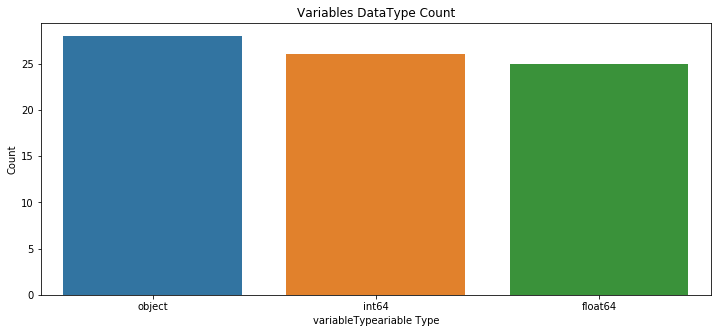

In [32]:
dataTypeDf = pd.DataFrame(all_data.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
print(dataTypeDf)
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")
#   variableType  count
# 0       object     42
# 1        int64     26
# 2      float64     11

In [33]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.782130
LotArea,12.835958
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.944494


In [34]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:                                                                                                         
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 51 skewed numerical features to Box Cox transform


In [35]:
numeric_cols = all_data.columns[all_data.dtypes != 'object']
numeric_cols

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fireplaces', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'HeatingQC', 'Id',
       'KitchenAbvGr', 'KitchenQual', 'LotArea', 'LotFrontage', 'LotShape',
       'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [36]:
numeric_col_means = all_data.loc[:, numeric_cols].mean()
numeric_col_std = all_data.loc[:, numeric_cols].std()
all_data.loc[:, numeric_cols] = (all_data.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [37]:
all_data = pd.get_dummies(all_data)

In [38]:
all_data.to_csv('all_data_with_dummies.csv',index=False)#将其写入保存

In [39]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [42]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [43]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [44]:

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                            nthread = -1)

In [45]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1209 (0.0077)



In [54]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
# 显示重要特征
plot_importance(model_xgb)
plt.show()

XGBoostError: need to call fit beforehand

In [52]:
importance = model_xgb.get_fscore(fmap='xgb.fmap')  
importance = sorted(importance.items(), key=operator.itemgetter(1))  
df = pd.DataFrame(importance, columns=['feature', 'fscore'])  
df['fscore'] = df['fscore'] / df['fscore'].sum()  
df.to_csv("feat_importance.csv", index=False)  

plt.figure()  
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))  
plt.title('XGBoost Feature Importance')  
plt.xlabel('relative importance')  
plt.show()  

AttributeError: 'XGBRegressor' object has no attribute 'get_fscore'

In [46]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [47]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [48]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [101]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [49]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

ModuleNotFoundError: No module named 'lightgbm'

In [50]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1243 (0.0146)



D:\Python\Anaconda_install_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Python\Anaconda_install_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Python\Anaconda_install_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Python\Anaconda_install_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

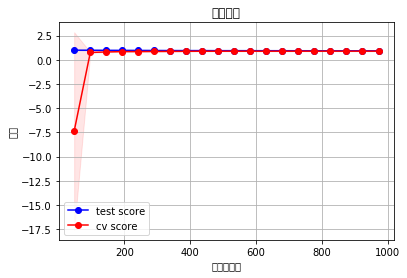

(0.9081420714588311, 0.05886465484535042)

In [53]:
plot_learning_curve(lasso, u"学习曲线", train.values, y_train)

In [105]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1243 (0.0146)



In [106]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1210 (0.0076)



In [107]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [108]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1195 (0.0137)



In [109]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [110]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000002A0B4FAEE80>>
Traceback (most recent call last):
  File "C:\Users\caiqiang\Anaconda3\lib\site-packages\xgboost\core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000002A0B6714908>>
Traceback (most recent call last):
  File "C:\Users\caiqiang\Anaconda3\lib\site-packages\xgboost\core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


Stacking Averaged models score: 0.1179 (0.0132)


In [111]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [112]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0751286863876


In [113]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.0794247076483


In [114]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.0749504686552


In [115]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.0732520544712


### 特征重要度

In [40]:
import numpy as np  
import pandas as pd  
import xgboost as xgb  
import operator  
import matplotlib.pyplot as plt  

In [50]:
def create_feature_map(features):  
    outfile = open('xgb.fmap', 'w')  
    m = 0  
    for feat in features:  
        outfile.write('{0}\t{1}\tq\n'.format(m, feat))  
        i = m + 1  
    outfile.close()  

In [48]:
cat_sel = train.columns #类别特征数值化  
for column in cat_sel:  
    train[column] = pd.factorize(train[column].values , sort=True)[0] + 1

In [51]:
params = {  
        'min_child_weight': 100,  
        'eta': 0.02,  
        'colsample_bytree': 0.7,  
        'max_depth': 12,  
        'subsample': 0.7,  
        'alpha': 1,  
        'gamma': 1,  
        'silent': 1,  
        'verbose_eval': True,  
        'seed': 12  
    }  
rounds = 10  
# y = pd.read_csv('./data/train.csv').SalePrice  
X = train.drop(['Id'], 1)  
X.head()
xgtrain = xgb.DMatrix(X, label=y_train)  
bst = xgb.train(params, xgtrain, num_boost_round=rounds)  

features = [x for x in train.columns if x not in ['Id']]  
create_feature_map(features)  

importance = bst.get_fscore(fmap='xgb.fmap')  
importance = sorted(importance.items(), key=operator.itemgetter(1))  

df = pd.DataFrame(importance, columns=['feature', 'fscore'])  
df['fscore'] = df['fscore'] / df['fscore'].sum()  
df.to_csv("../input/feat_sel/feat_importance.csv", index=False)  

plt.figure()  
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))  
plt.title('XGBoost Feature Importance')  
plt.xlabel('relative importance')  
plt.show() 

XGBoostError: b'[16:17:05] include/xgboost/././feature_map.h:47: Check failed: fid == static_cast<int>(names_.size()) (0 vs. 1) '

In [46]:
y_train.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [43]:
bst.get_fscore()

{}

In [60]:
# 显示重要特征
plot_importance(bst)
plt.show()

ValueError: Booster.get_score() results in empty

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"test score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"cv score")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff